In [1]:
import pandas as pd 

In [4]:
d =pd.read_csv('/content/drive/MyDrive/heart.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


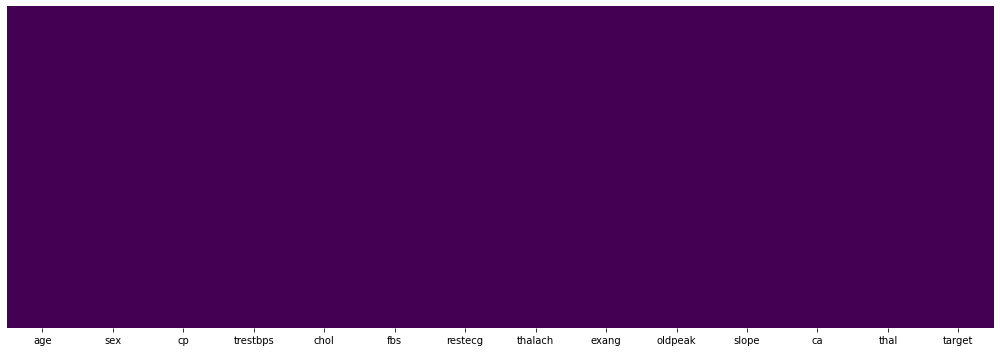

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
 #this function gives heatmap of all non values
 plt.figure(figsize=(14,5))
 sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')
 plt.tight_layout()
 return plt.show()
 
get_heatmap(d)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


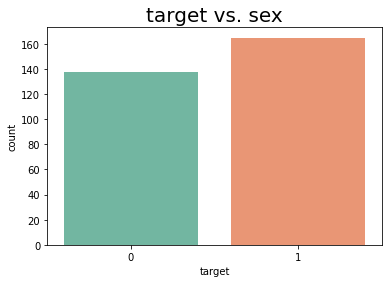

In [8]:
sns.countplot(d['target'], palette = 'Set2')
plt.title ('target vs. sex', fontsize = 20)
plt.show()

In [9]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
d.shape

(303, 14)

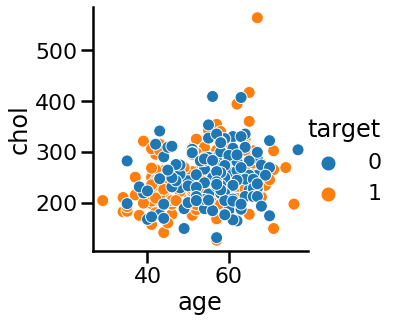

In [12]:
# Generate relation ship plot between Age and target on chol
sns.set_context("poster")
sns.relplot(data=d, x="age", y="chol", hue="target")

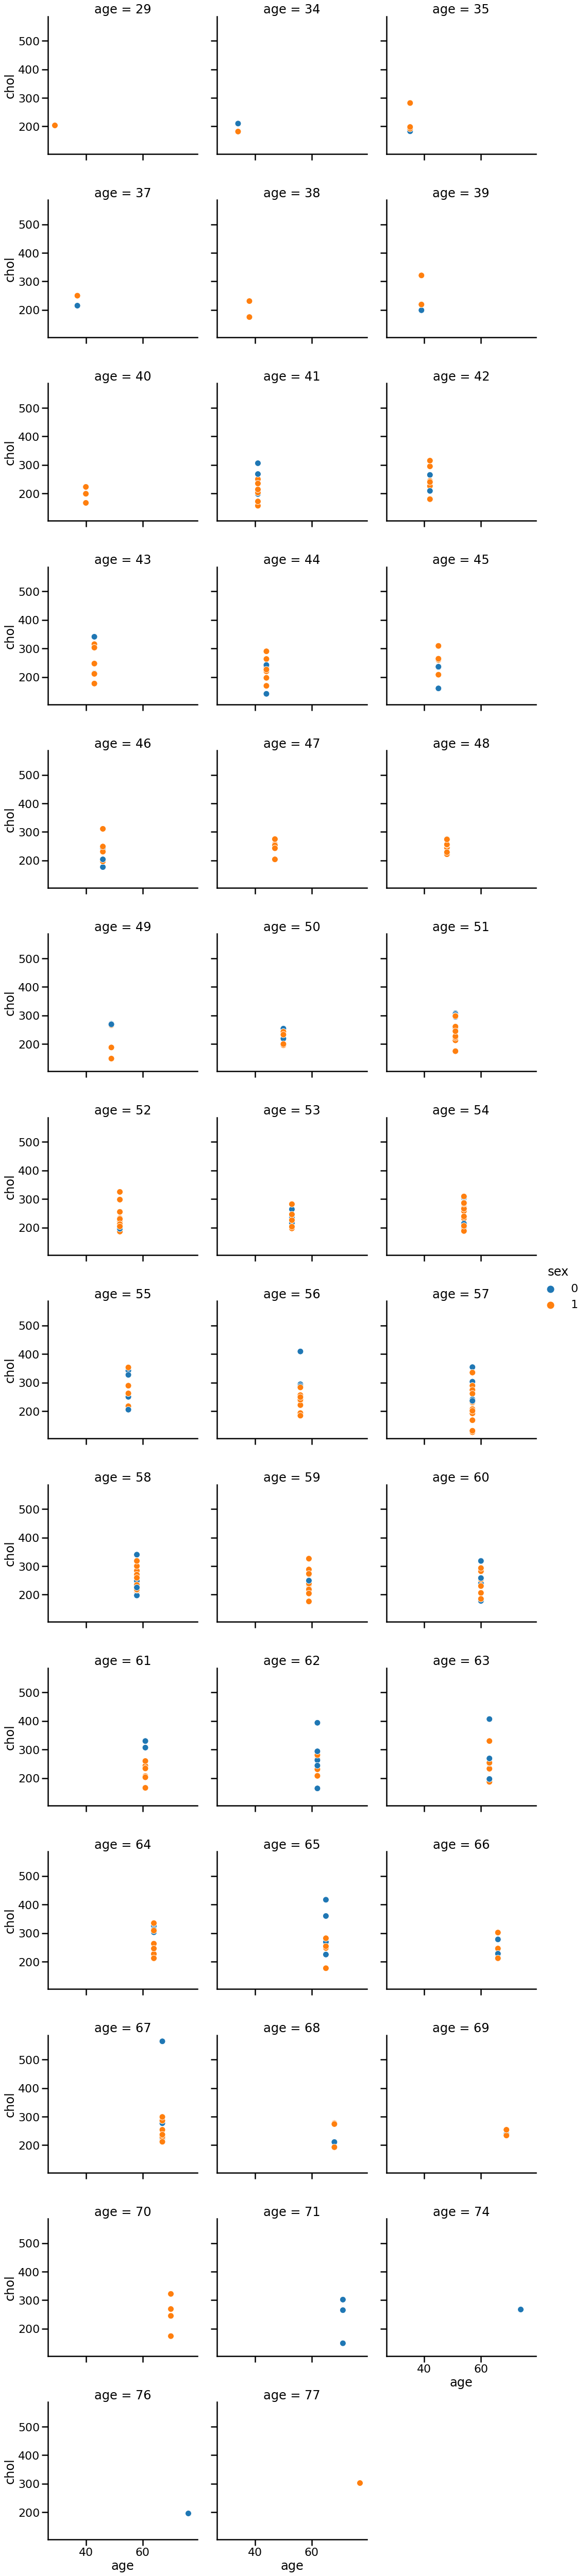

In [13]:

sns.set_context("poster")
sns.relplot(data=d,x="age",y="chol",hue="sex",col="age",col_wrap=3)

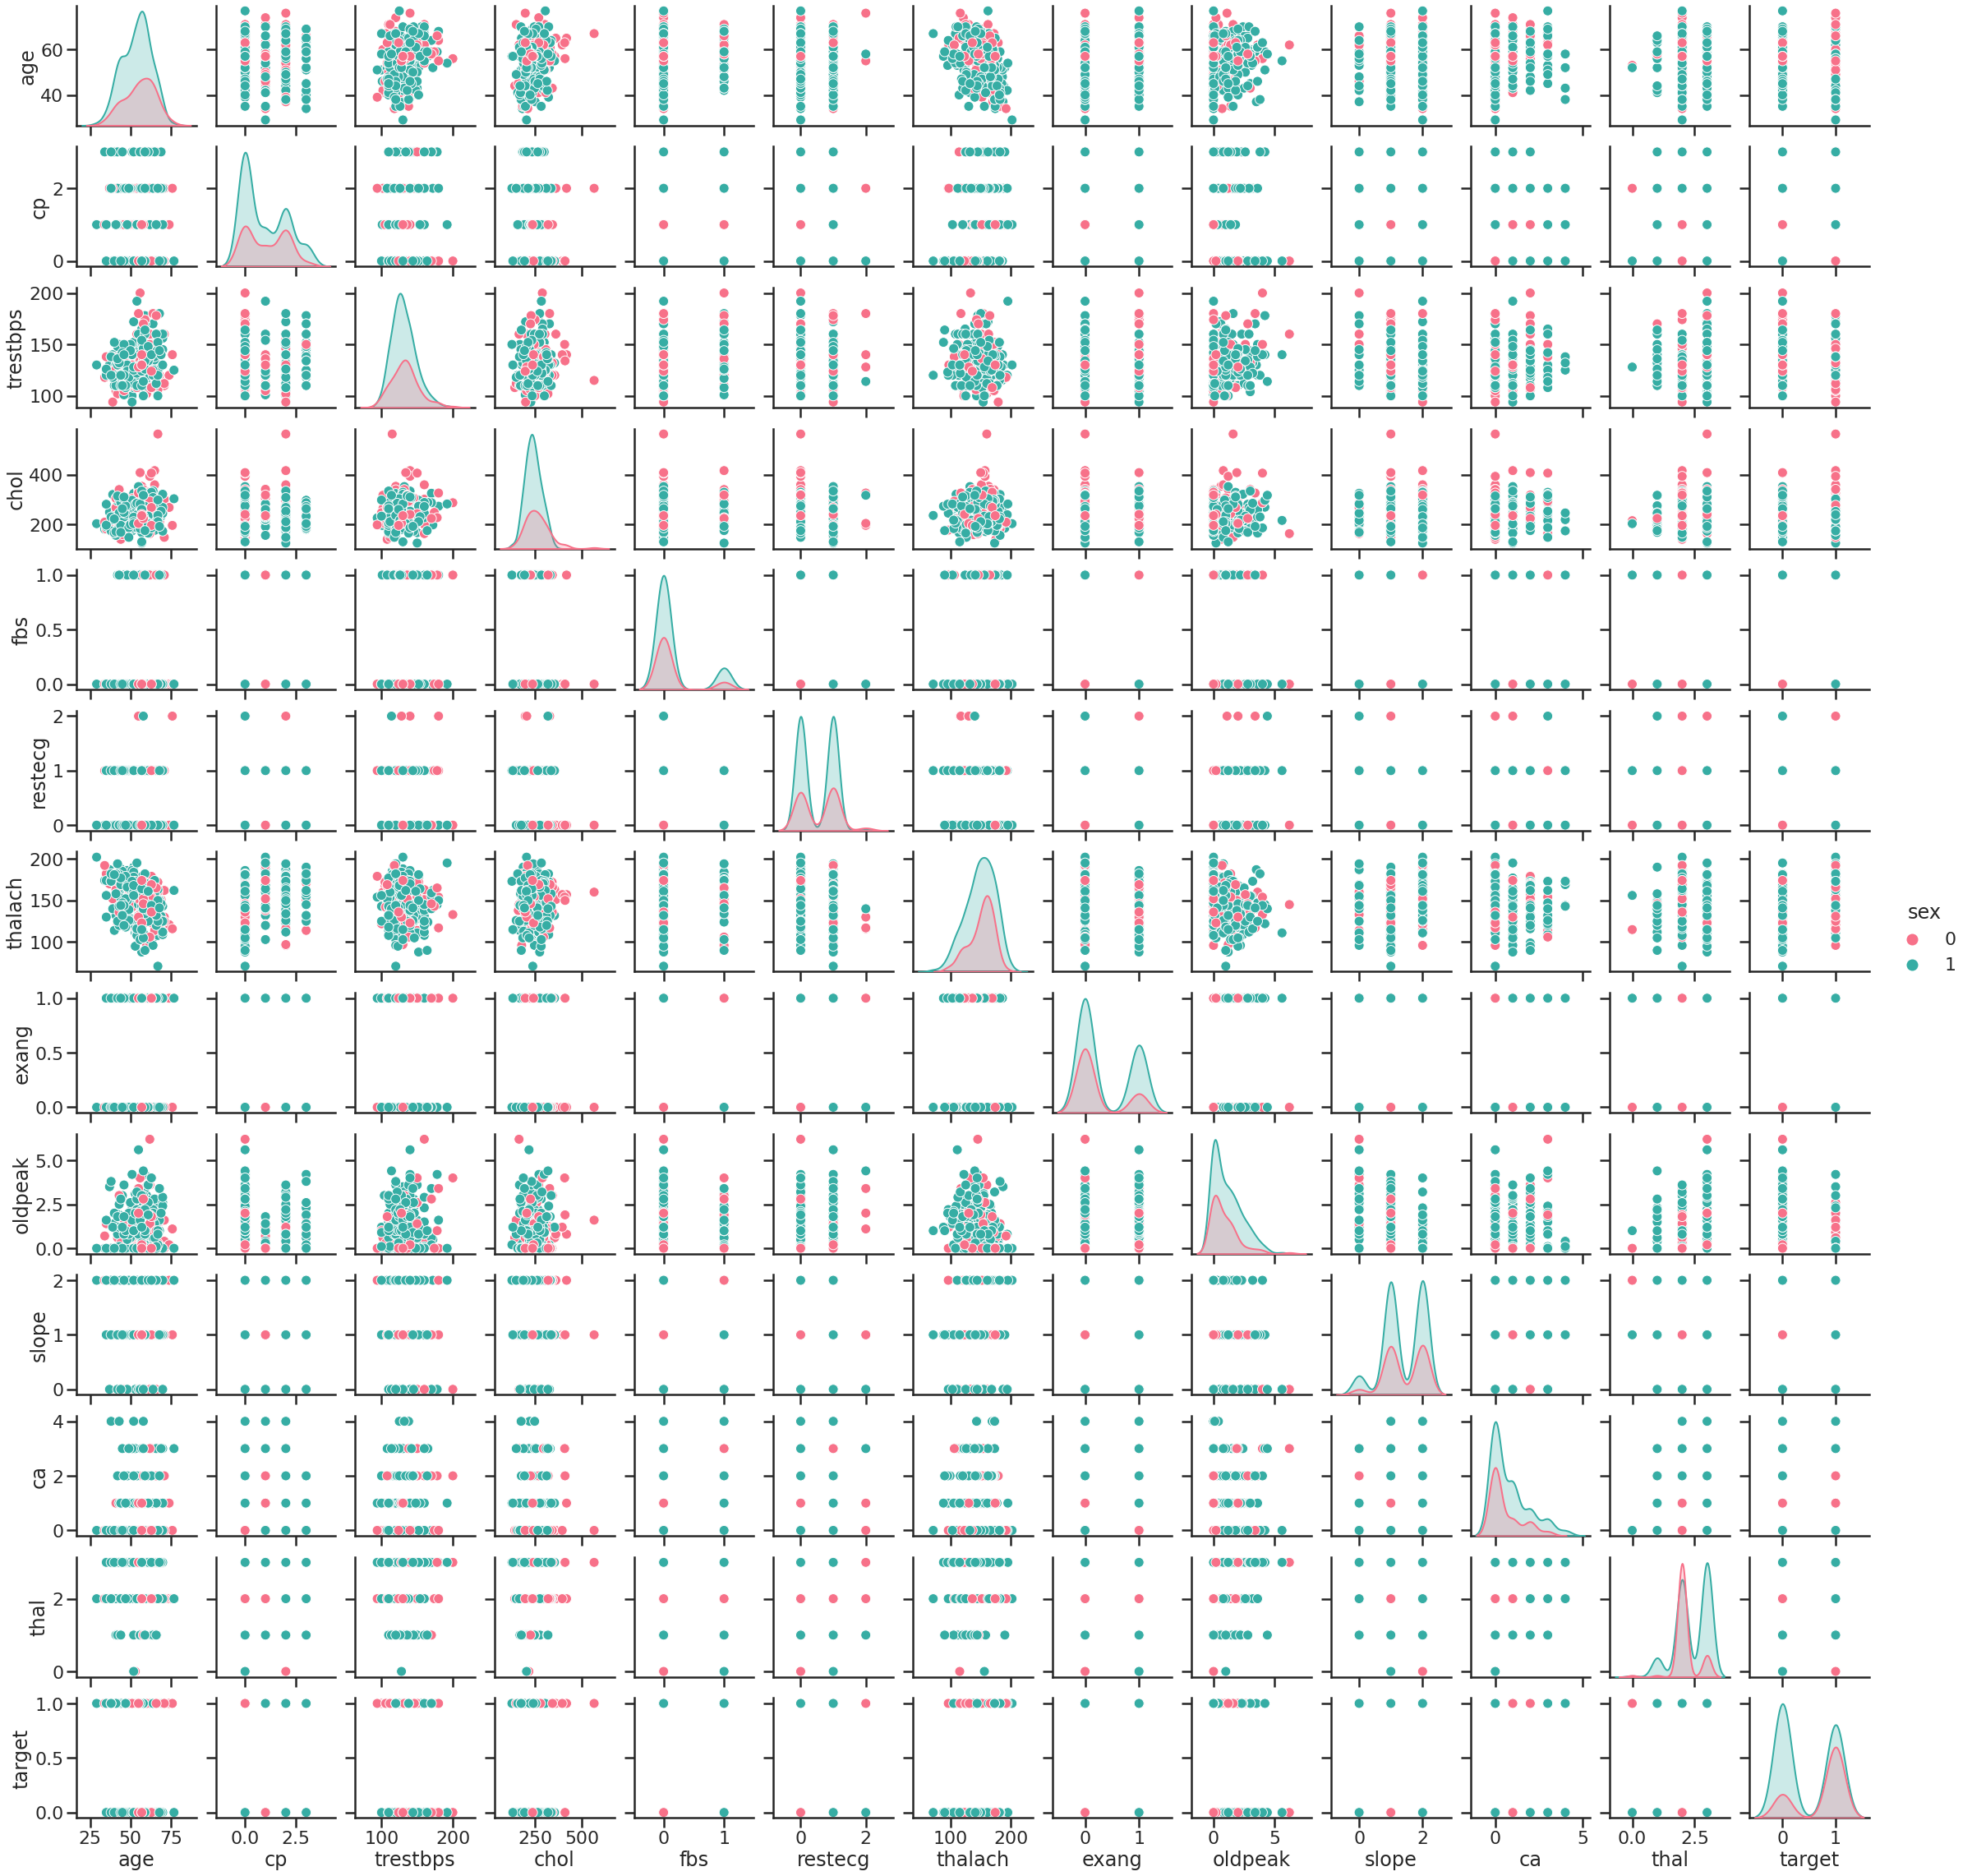

In [14]:
#pairplot
sns.set_style("ticks")
sns.pairplot(d,hue='sex',diag_kind="kde",kind="scatter",palette="husl")
plt.show()

In [15]:
#importing standardscaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

#standardizing the data apart from the class column
data_scaled=d.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

#data_scaled = pd.DataFrame(sst.fit_transform(df.drop('Outbreak',axis=1)))
#Adding the class column back to the DataFram

In [16]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [17]:
data_scaled['class'] = d.target

In [18]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,class
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


In [19]:
data_scaled = data_scaled[data_scaled['class'].notna()]

In [20]:
#loading the data
x = data_scaled.iloc[:,0:13]
y = data_scaled.iloc[:,13:14]

In [21]:
#splitting the dataset
#splitting the dataset into Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [22]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
187,-0.040403,0.681005,-0.938515,-0.435415,0.381407,-0.417635,-1.005832,-1.777508,1.435481,1.001069,-0.649113,0.265082,1.123029
31,1.172774,0.681005,-0.938515,-0.663867,-1.338561,-0.417635,0.898962,-0.421862,-0.696631,-0.551783,0.976352,-0.714429,1.123029
203,1.503641,0.681005,1.002577,2.762907,0.536011,2.394438,-1.005832,0.015443,1.435481,0.483451,-0.649113,-0.714429,1.123029
70,-0.040403,0.681005,1.002577,-0.663867,0.226803,-0.417635,-1.005832,-0.115749,-0.696631,-0.551783,-0.649113,-0.714429,1.123029
251,-1.253580,0.681005,-0.938515,0.021488,0.014223,2.394438,-1.005832,-0.290671,1.435481,-0.810592,-0.649113,3.203615,1.123029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.290464,0.681005,0.032031,-0.435415,0.284780,-0.417635,0.898962,-0.378132,-0.696631,-0.638053,0.976352,-0.714429,1.123029
256,0.400752,0.681005,-0.938515,-0.206964,0.246129,-0.417635,-1.005832,-0.859167,1.435481,1.691225,-0.649113,1.244593,1.123029
131,-0.591847,-1.468418,0.032031,0.135714,0.478035,-0.417635,0.898962,0.540209,-0.696631,-0.896862,-0.649113,-0.714429,-0.512922
249,1.613930,0.681005,1.002577,0.478391,0.149501,-0.417635,-1.005832,-0.159479,-0.696631,0.828529,-0.649113,2.224104,1.123029


In [23]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
#fit logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
#predict the test set results
y_pred=classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#generate confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 9,  3],
       [ 1, 18]])

In [27]:
#find accuracy score(accuracy=number of times you're right/number of predictions)
from sklearn.metrics import accuracy_score
paccur=accuracy_score(y_true=y_train,y_pred=classifier.predict(X_train))
print('The accuracy of the logistic regression is: ' +str(paccur*100)+ '%.')

The accuracy of the logistic regression is: 86.39705882352942%.


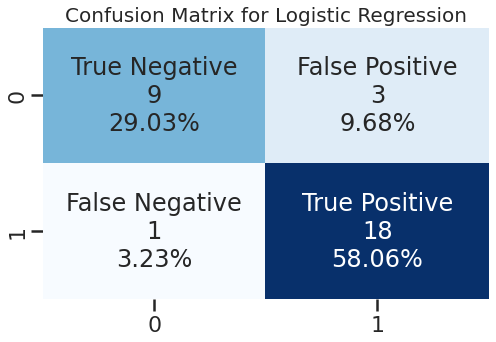

In [28]:
import numpy as np
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
 cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
 cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap='Blues', cbar = False)
plt.gcf().set_size_inches(8,5)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.show()

In [29]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, test_size=0.20)


In [31]:
y_train.value_counts(normalize=True)

class
1        0.557851
0        0.442149
dtype: float64

In [32]:
#distribution in validation set
y_valid.value_counts(normalize=True)

class
0        0.508197
1        0.491803
dtype: float64

In [33]:
#shape of training set
X_train.shape, y_train.shape

((242, 13), (242, 1))

In [34]:
#shape of validation set
X_valid.shape, y_valid.shape

((61, 13), (61, 1))

In [35]:
#importimg decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
#importimg decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [37]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [38]:
#fitting the model
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=10)

In [39]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [40]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.819672131147541

In [41]:
#predictions on validation set
dt_model.predict(X_valid)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [42]:
dt_model.predict_proba(X_valid)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [43]:
y_pred = dt_model.predict_proba(X_valid) [:,1]

In [44]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.4:
       new_y.append(0)
    else:
       new_y.append(1)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_valid, new_y)


0.819672131147541

In [47]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [48]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.768595,0.721311
1,2,0.772727,0.754098
2,3,0.842975,0.803279
3,4,0.900826,0.786885
4,5,0.938017,0.770492


No handles with labels found to put in legend.


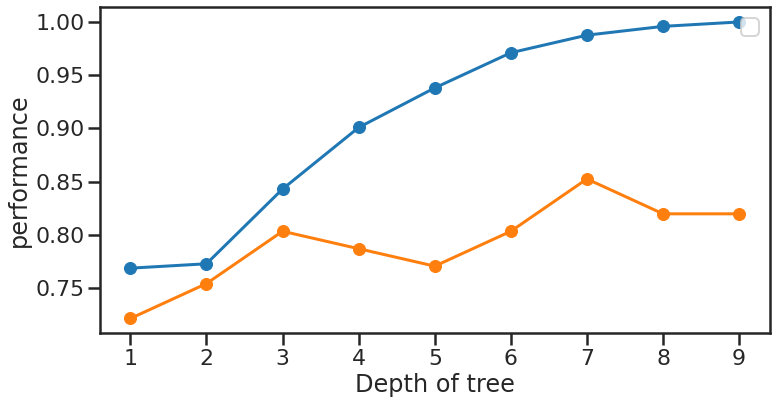

In [49]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [50]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=10)

In [51]:
#training score
dt_model.score(X_train, y_train)

1.0

In [52]:
#validation score
dt_model.score(X_valid, y_valid)

0.819672131147541

[Text(0.45703125, 0.95, 'X[2] <= -0.453\ngini = 0.493\nsamples = 242\nvalue = [107, 135]'),
 Text(0.2526041666666667, 0.85, 'X[11] <= -0.225\ngini = 0.402\nsamples = 115\nvalue = [83, 32]'),
 Text(0.13020833333333334, 0.75, 'X[8] <= 0.369\ngini = 0.5\nsamples = 53\nvalue = [26, 27]'),
 Text(0.041666666666666664, 0.65, 'X[0] <= -1.419\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(0.020833333333333332, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0625, 0.55, 'X[9] <= 1.217\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.041666666666666664, 0.45, 'X[7] <= -2.324\ngini = 0.219\nsamples = 24\nvalue = [3, 21]'),
 Text(0.020833333333333332, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0625, 0.35, 'X[4] <= 0.507\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.041666666666666664, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.08333333333333333, 0.25, 'X[3] <= -0.55\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.0625, 0.15, 'gi

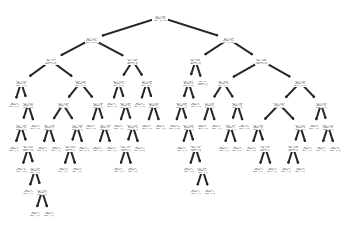

In [53]:
from sklearn import tree
tree.plot_tree(dt_model,)

In [54]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
ecision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=10,filled=True)

In [57]:
!dot -Tpng tree.dot -o tree.png

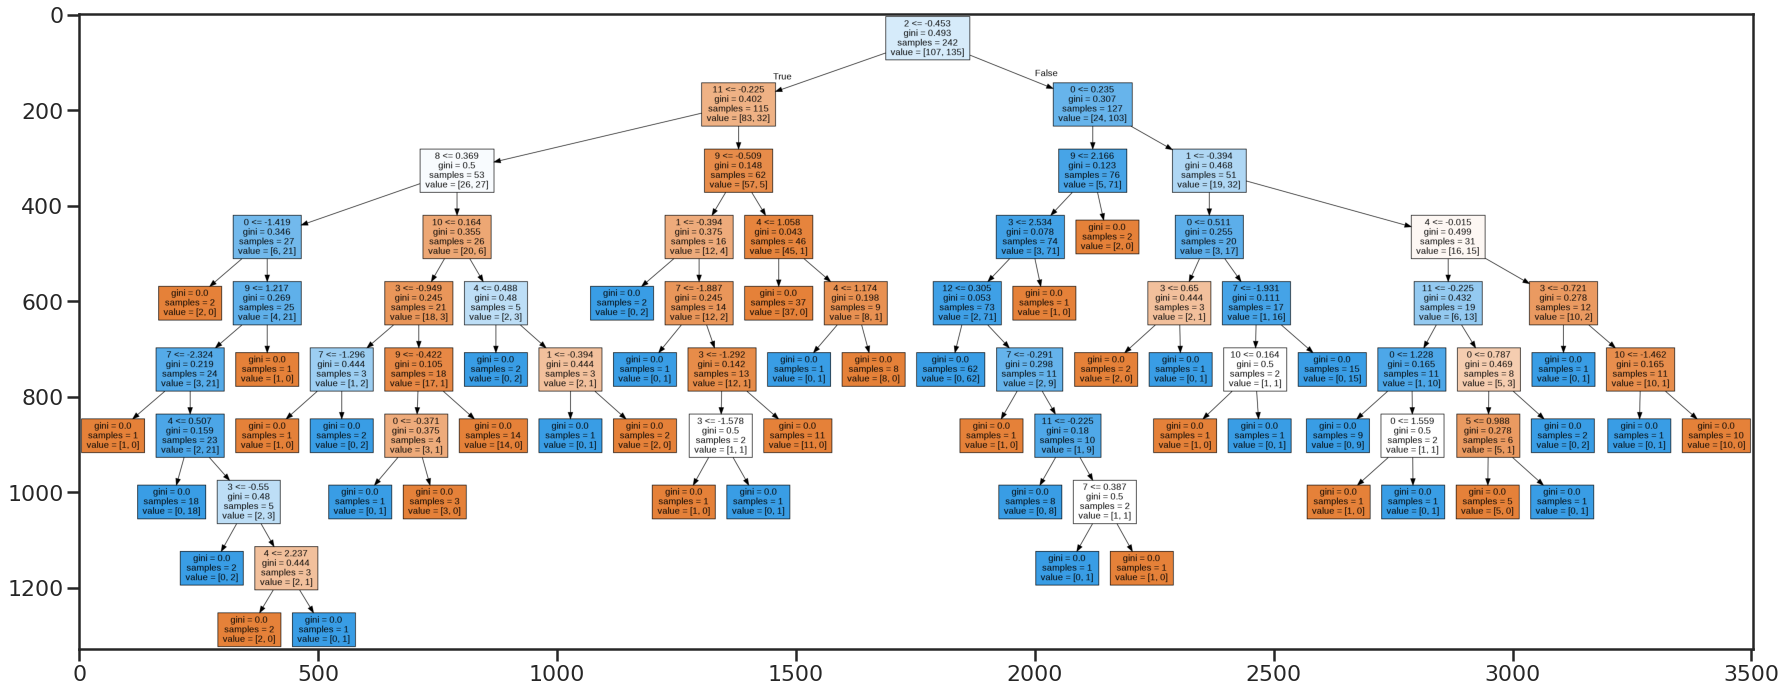

In [58]:
image =plt.imread('tree.png')
plt.figure(figsize=(30,30))
plt.imshow(image)

In [59]:
# Kernel = linear
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_LSVM = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_LSVM)
print('confusion matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred_LSVM)
print('accuracy score = ',sva)


confusion matrix:
 [[ 9  3]
 [ 1 18]]
accuracy score =  0.8709677419354839


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
# SVM - Kernel -rbf
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_RSVM = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_RSVM)
print('confusion matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred_RSVM)
print('accuracy score = ',sva2)

confusion matrix:
 [[ 9  3]
 [ 0 19]]
accuracy score =  0.9032258064516129


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
